<a href="https://colab.research.google.com/github/nabinyd/60-Days-of-learning/blob/main/DLPT_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 04

## **Pytorch Workflow**

In [ ]:
what_were_covering = {
    1:  "data (prepare and load)",
    2:  "build model",
    3:  "fitting the model to data (training)",
    4:  "making predictions and evaluating a model (inference)",
    5:  "saving and loading a model",
    6:  "putting it all together"
}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.3.0+cu121'

###  1. **Data (preparing and loading)**

Data can be almost anything... in machine learning.


  *  Excel spreadsheet
  *  Images of any kind
  *  Videos (Youtube has lots of data)
  *  Audio like songs or podcasts
  *  DNA
  *  Text

###**Linear regression**

Machine learning is a game of two parts:

1. Get data into numerical representations
2. Build a model to learn patterns in that numerical representation.


To showcase this let's create some *known* data using liner regression formula

We will use a linear regression formula to make a straight line with known **Parameters**.


In [ ]:
# create known paramenters

weight = 0.7
bias =  0.3

# create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

Y= weight * X + bias

X[:10],  Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

 #### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

 Let's create a training and test set with our data.

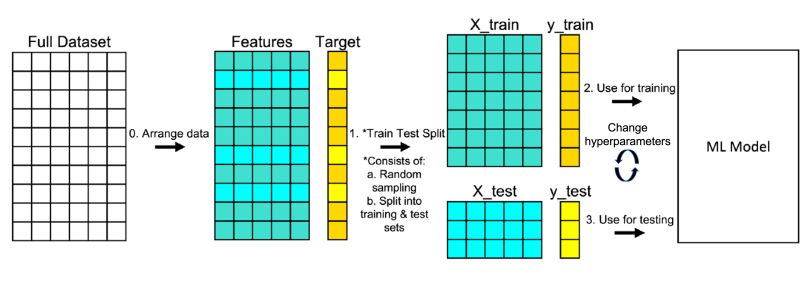

In [ ]:
len(X), len(Y)

(50, 50)

In [ ]:
# Create a train/ test split
train_split = int(0.8 * len(X))
print(train_split)


40


In [ ]:
x_train, y_train = X[:train_split], Y[:train_split]
#x_train, y_train
x_test,y_test = X[train_split:], Y[train_split:]
#x_test, y_test

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(
    train_data = x_train,
    train_labels = y_train,
    test_data = x_test,
    test_label = y_test,
    predictions= None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize = (10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s= 4, label =" Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_label, c= "g", s= 4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exists
    plt.scatter(test_data,predictions, c="r", s= 4, label = "Predictions")


  # Show the legend
  plt.legend(prop={"size":14});




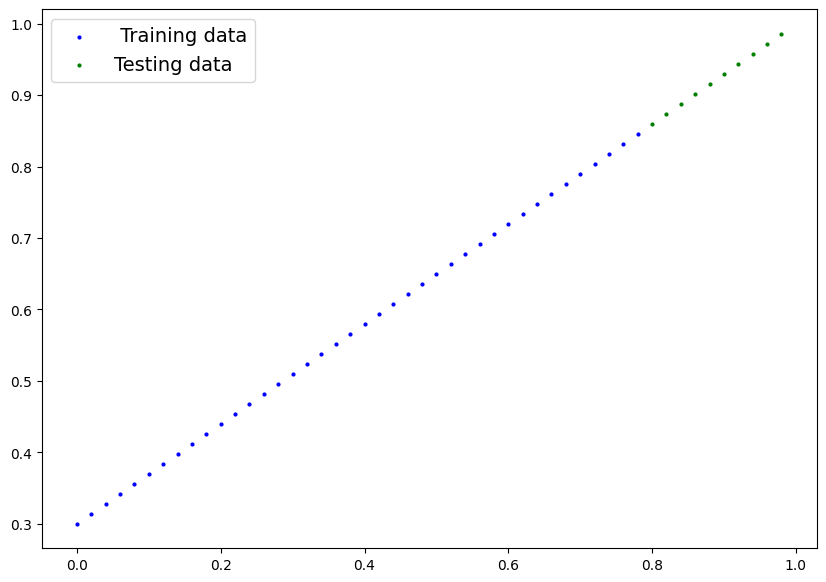

In [ ]:
plot_predictions()

#Day 5

## 2. Build model

**What our model does**
*  Start with random values (weights and bias)
*  Look at training data and adjust the random values to better represent (orget closer to ) the ideal calues (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1.  Gradient descent
2.  Backpropagation

###**Gradient descent**
Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning, expecially for training neural networks. The goal is to find the parameters (weights) that minimize the difference between the predicted output and the actual output.

***How it works***
*  **Cost Function**: Imagine you are training a model to predict housing prices. The cost functions measures how wrong your model's prediction are compared to the actual prices. It acts as a guide for the optimization process. Common cost functions include mean squared error (MSE) or cross- entropy for classification problems.

*  **Parameters and Gradients:**
    *  The gradient is the vector of partial derivatives of the cost function with respect to the model's parameter's.

    *  The gradient of the cost function with resprect to a praameter tells you how much changing that parameter will affect the overall error.
    
    * It points inthe direction of steepest descent (decrease) of the cost function.

*  **Learning rate**: This is a hyperparameter that determines the step size at each iteration while moving towards a minimum of the cost function . A small learning rate migght make the algorithm skow to converge while a large learning rate might cause it to overshoot the minimum.

**The gradient descent process**:
1. calulates the cost function based on the current parameter values.

2. Calculates the gradients of the cost function with respect to each parameter.

3. Update each parameter by subtracting a small learning rate times the corresponding gradient. The learning rate controls the step size in the direction of the negative gradient.

4. Repeat these steps until the cost function converges (stops significantly decreasing ) or reaches a maximum number of iterations.


***In essence, gradient descent  is like rolling a ball down a bumpy landscape. You iteratively adjust ball's direction based on the steepest descent to reach the valley (minimum) representing the best model performance.***



#### **Mathematical Formulation for Gradient Descent in Linear Regression**

For a simple linear regression model with parameters
𝑤
w (weights) and
𝑏
b (bias), the gradient descent update rule is:


`w:=w−α
∂w
∂J(w)`

​`
𝑏
:
=
𝑏
−
𝛼
∂
𝐽
(
𝑏
)
∂
𝑏
b:=b−α
∂b
∂J(b)`

Where:

 * `α` is the learning rate.

* `J(w)` is the cost function.


**Example: Linear Regression**

Consider a linear regression model with a cost function
`J(w,b)` defined as the Mean Squared Error (MSE):

Consider a linear regression model with a cost function \( J(w, b) \) defined as the Mean Squared Error (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (h(x_i) - y_i)^2
$$

Where:
- \( m \) is the number of training examples.
- \( h(x_i) = w \cdot x_i + b \) is the hypothesis or predicted value.

The gradients of the cost function with respect to \( w \) and \( b \) are:

$$
\frac{\partial J(w, b)}{\partial w} = \frac{2}{m} \sum_{i=1}^{m} (h(x_i) - y_i) \cdot x_i
$$

$$
\frac{\partial J(w, b)}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} (h(x_i) - y_i)
$$

The parameters are updated as follows:

$$
w := w - \alpha \frac{2}{m} \sum_{i=1}^{m} (h(x_i) - y_i) \cdot x_i
$$

$$
b := b - \alpha \frac{2}{m} \sum_{i=1}^{m} (h(x_i) - y_i)
$$


In [ ]:
from torch import nn
 # Create liner regression model class


class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initialize model parameters
    self.weights  = nn.Parameter(torch.randn( 1, requires_grad = True,dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True,dtype = torch.float))



    #  Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias   # This is the linear regression formula


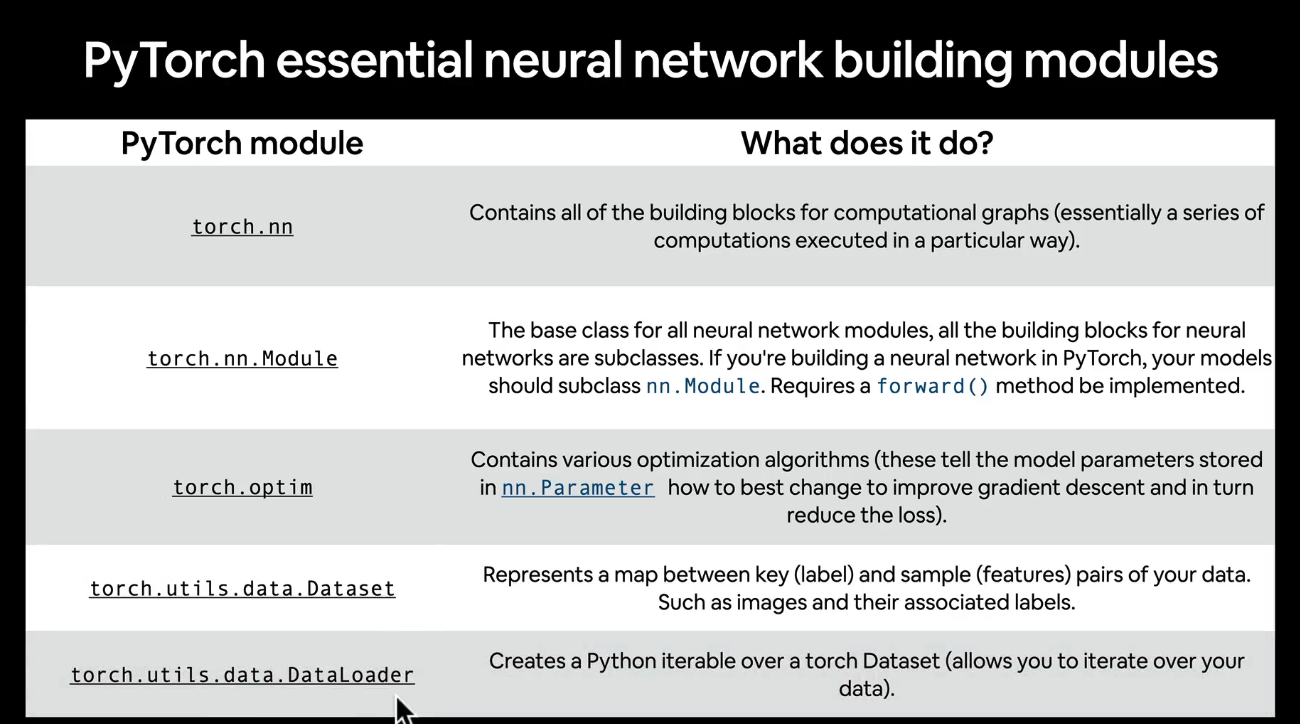

### Checking the contents of out PyTorch model

We can check the model parameters or what's inside out model using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module)
model_O = LinearRegressionModel()

# Check out the parameters
list(model_O.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_O.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###**torch.inference_mode( )**:

PyTorch inference mode is a context manager that allows you to perform model inference (i.e making predictions with trained model) more efficiently. Inference mode is specifically designed to improve the performance of you model during inference by disabling certain features that are only needed during training, such as gradient computation and autograd.


**Key features and benefits**

1. **Disbles Gradient Calculation**: During inference, gradients are not required. Disabling gradient calculation reduces memory usage and speeds up computaion.

2. **Optimizes memory usages**: By disabling autograd, PyTorch can avoid storing intermediate results that are onlynecessary for back propagation during training.

3. **simplifies code**: Using inference mode  makes it explicit that the code block is intended for inference, which can help prevent accidental modifications to the  model's parameters.


**Comparison with `torch.no_grad()`**:

   *  `torch.no_grad()` : Disables gradient calculation, but autograd is still enabled. SUitable for most inference tasks and prevents gradient calculation, thus saving memory.

   *  `torch.inference_mode()` : Fully disables autograd, providing a slight performance boost over `torch.no_grad()`. It is more efficient and recommended for purely scenarios.

In [ ]:
with torch.inference_mode():
  y_preds = model_O(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

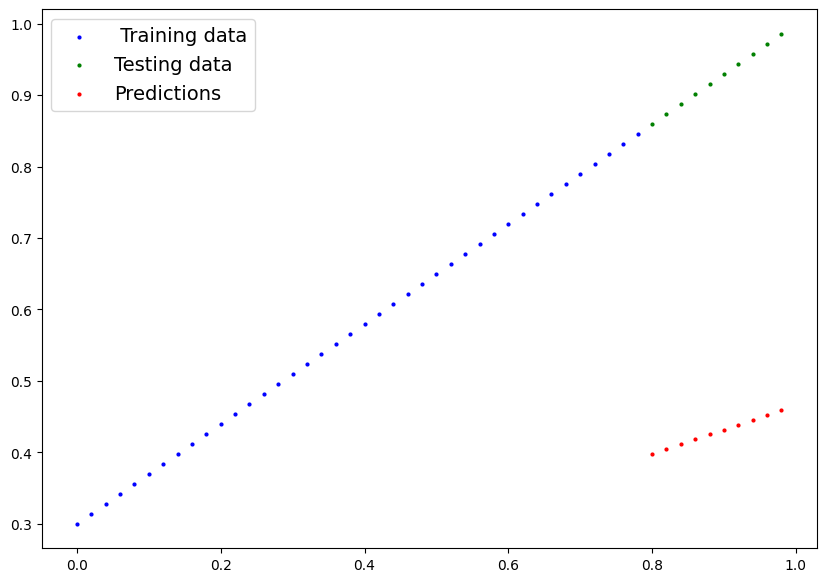

In [ ]:
with torch.no_grad():
  y_preds = model_O(x_test)

y_preds
plot_predictions(predictions=y_preds)

##**Training model**

One way to measure how poor or how wrong you models predictions are is to use a loss function.

  *  Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

   *  **Loss Function**: A funciton to measure how wrong your model's predictions are to the ideal outputs, lower is better.

   *  **Optimizer** : Takes into account the loss of a model and adjusts the models's paramenters(e.g weight and bias)
      
      *  Inside the optimizer you'll often have to set two parameters:
        
         *  `params` : the model parameters you'd like to optimize, for example `params =model_O.parameters()`

         *  `lr` (learning rate) : the learning rate is hyperparameter that defines how big/small the optimizer changes the parameters witheach step (a small `lr` results in small changes, a large `lr` results in large changes)

In [ ]:
model_O.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_O.parameters(), lr=0.001)

## Building a training loop  (and a testing loop ) in pytorch